# Rock, Paper, Scissors

### Import modules

In [93]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Set initial values

In [94]:
dir_images = "D:\\images"
image_size = (300, 300)
validation_split = 0.15
seed = np.random.randint(1)

### Data Preparation

#### Import local database as train and validation datasets

In [101]:
(train_ds, validation_ds) = tf.keras.utils.image_dataset_from_directory(
    directory=dir_images,
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    image_size=image_size,
    seed=seed,
    validation_split=validation_split,
    subset='both',
    interpolation='bilinear',
    crop_to_aspect_ratio=False
)

Found 5113 files belonging to 3 classes.
Using 4347 files for training.
Using 766 files for validation.


#### Data Visualization

In [102]:
class_names = train_ds.class_names
class_names

['paper', 'rock', 'scissors']

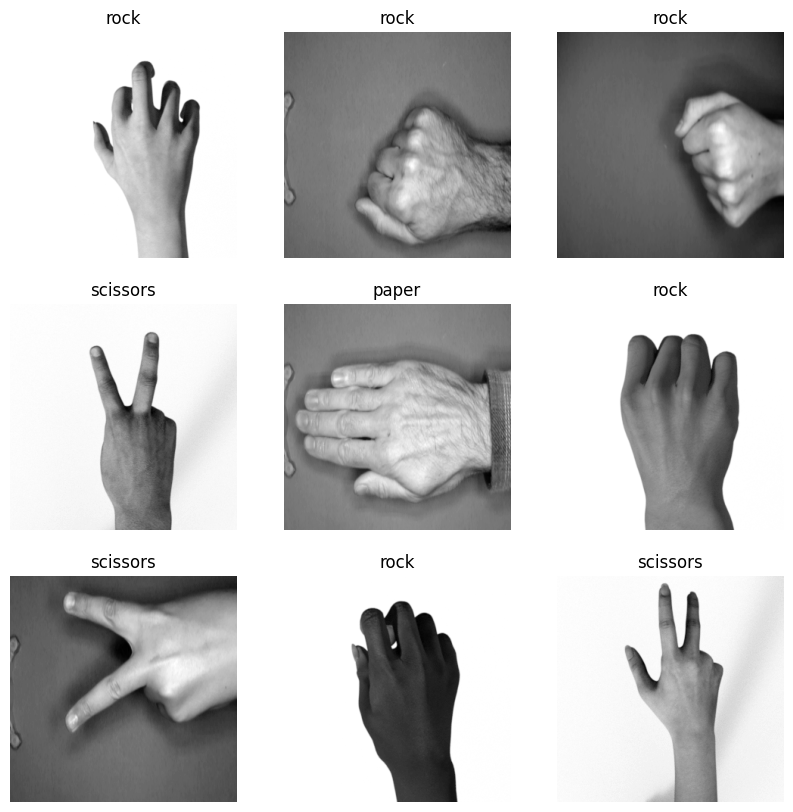

In [109]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap="gray")
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

#### 

### Modeling

In [ ]:
def create_rps(digit_size : tuple[int, int, int] = (28, 28, 1),
                      convnn_acivation : str = 'relu',
                      fully_connected_acivation : str = 'tanh',
                      net_name : str = 'LittleEyes',
                      hyperparameter : int = 1):
    # CAMADA OCULTA
    inputs = Input(shape=digit_size)

    # PRIMEIRA CAMADA CONVOLUCIONAL
    conv_2d_layer_1 = layers.Conv2D(2 * hyperparameter, (3, 3), activation = convnn_acivation)
    x = conv_2d_layer_1(inputs)

    # PRIMEIRA CAMADA MAX POOLING
    maxpool_1 = layers.MaxPooling2D((2, 2))
    x = maxpool_1(x)

    # SEGUNDA CAMADA CONVOLUCIONAL
    conv_2d_layer_2 = layers.Conv2D(4 * hyperparameter, (3, 3), activation = convnn_acivation)
    x = conv_2d_layer_2(x)

    # SEGUNDA CAMADA MAX POOLING
    maxpool_2 = layers.MaxPooling2D((2, 2))
    x = maxpool_2(x)

    # TERCEIRA CAMADA CONVOLUCIONAL
    conv_2d_layer_3 = layers.Conv2D(4 * hyperparameter, (3, 3), activation = convnn_acivation)
    x = conv_2d_layer_3(x)

    # TERCEIRA CAMADA MAX POOLING
    maxpool_3 = layers.MaxPooling2D((2, 2))
    x = maxpool_3(x)

    # FLATTEN
    flatten_layer = layers.Flatten()
    x = flatten_layer(x)

    # FULLY CONNECTED HIDDEN LAYER
    hidden_layer = layers.Dense(hyperparameter + 1, activation = fully_connected_acivation)
    x = hidden_layer(x)

    # OUTPUT LAYER
    output_layer = layers.Dense(10)
    outputs = output_layer(x)

    return Model(inputs = inputs, outputs = outputs, name = net_name)